In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

In [23]:
hikes = pd.read_csv('../data/wta-parks-data.csv', sep='\t', index_col=0)
hikes_model = hikes.drop(columns=['description','url','name','pass: None','votes', 'lat','lon','drive distance']).dropna()

In [25]:
def train_test_score(n, model, X_train, X_test, y_train, y_test):
    train_score = np.zeros(n)
    for i, y_pred in enumerate(model.staged_predict(X_train)):
        train_score[i] = np.sqrt(mean_squared_error(y_train, y_pred))

    test_score = np.zeros(n)
    for i, y_pred in enumerate(model.staged_predict(X_test)):
        test_score[i] = np.sqrt(mean_squared_error(y_test, y_pred))
    
    return train_score, test_score

## Model of Reports feature

In [37]:
X = hikes_model.drop(columns=['reports','rating']).values
y = hikes_model['reports'].values
X_train, X_test, y_train, y_test = train_test_split(X, y)
columns = hikes_model.drop(columns=['reports','rating']).columns

In [38]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_hat = model.predict(X_test)

In [39]:
n = 1000
model = GradientBoostingRegressor(n_estimators=n)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

train_score, test_score = train_test_score(n, model, X_train, X_test, y_train, y_test)

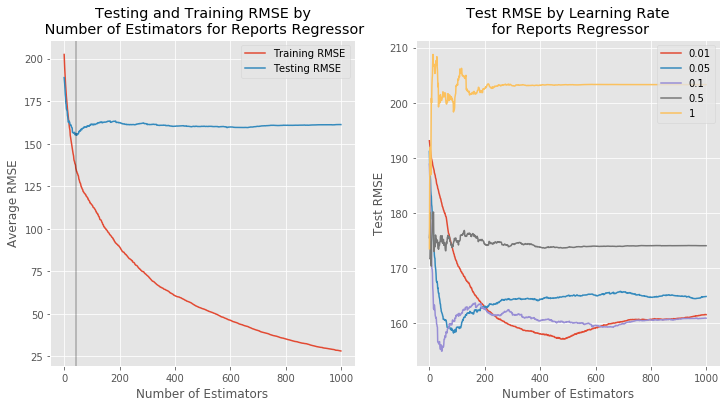

In [40]:
fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].plot(train_score, label="Training RMSE")
ax[0].plot(test_score, label="Testing RMSE")
ax[0].set_xlabel("Number of Estimators")
ax[0].set_ylabel("Average RMSE")
ax[0].legend()
ax[0].set_title("Testing and Training RMSE by\n Number of Estimators for Reports Regressor")
ax[0].axvline(x=np.argmin(test_score), color='black', linewidth=0.4)

lr = [0.01, 0.05, 0.1, 0.5, 1]
for l in lr:
    n_estimators = 1000
    model = GradientBoostingRegressor(learning_rate=l, n_estimators=n_estimators)
    model.fit(X_train, y_train)
    
    train_score, test_score = train_test_score(n_estimators, model, X_train, X_test, y_train, y_test)
    
    ax[1].plot(test_score, label=l)
    ax[1].set_title("Test RMSE by Learning Rate\n for Reports Regressor")
    ax[1].set_xlabel("Number of Estimators")
    ax[1].set_ylabel("Test RMSE")    
    ax[1].legend(loc='upper right')

plt.savefig("../images/reports_gbr_opt.png", bbox_inches='tight', dpi=350)

In [41]:
model = GradientBoostingRegressor(learning_rate=0.01, n_estimators=1000)
model.fit(X_train, y_train)

feat = 'reports'
print(f"The average {feat} value is {np.mean(hikes_model[feat]):.2f}.")
print(f"The standard deviation of the {feat} value is {np.std(hikes_model[feat]):.2f}.")
print(f"The model RMSE predicting the {feat} value is {np.sqrt(mean_squared_error(y_test, model.predict(X_test))):.2f}.")

The average reports value is 110.61.
The standard deviation of the reports value is 203.82.
The model RMSE predicting the reports value is 161.61.


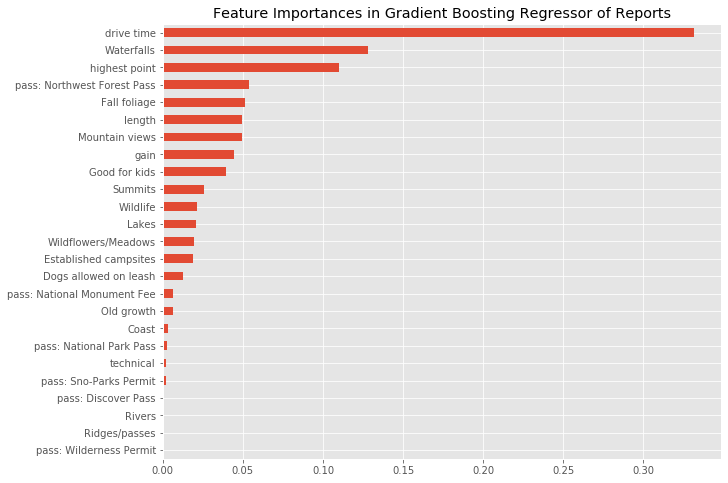

In [42]:
importances = pd.DataFrame({'features': model.feature_importances_}, 
                       index=columns)

reports_importances = importances.sort_values(by='features')
reports_importances.plot(kind='barh', figsize=(10,8), legend=False)
plt.title("Feature Importances in Gradient Boosting Regressor of Reports")
plt.savefig("../images/reports_gbr_feature_import.png", bbox_inches='tight', dpi=350)

## Model of Rating feature

In [43]:
X = hikes_model.drop(columns=['reports','rating']).values
y = hikes_model['rating'].values
X_train, X_test, y_train, y_test = train_test_split(X, y)
columns = hikes_model.drop(columns=['reports','rating']).columns

In [44]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_hat = model.predict(X_test)

In [45]:
n = 1000
model = GradientBoostingRegressor(n_estimators=n)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

train_score, test_score = train_test_score(n, model, X_train, X_test, y_train, y_test)

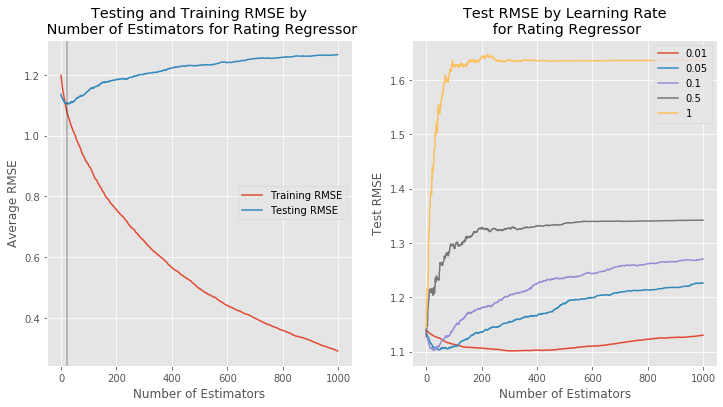

In [46]:
fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].plot(train_score, label="Training RMSE")
ax[0].plot(test_score, label="Testing RMSE")
ax[0].set_xlabel("Number of Estimators")
ax[0].set_ylabel("Average RMSE")
ax[0].legend()
ax[0].set_title("Testing and Training RMSE by\n Number of Estimators for Rating Regressor")
ax[0].axvline(x=np.argmin(test_score), color='black', linewidth=0.4)

lr = [0.01, 0.05, 0.1, 0.5, 1]
for l in lr:
    n_estimators = 1000
    model = GradientBoostingRegressor(learning_rate=l, n_estimators=n_estimators)
    model.fit(X_train, y_train)
    
    train_score, test_score = train_test_score(n_estimators, model, X_train, X_test, y_train, y_test)
    
    ax[1].plot(test_score, label=l)
    ax[1].set_title("Test RMSE by Learning Rate\n for Rating Regressor")
    ax[1].set_xlabel("Number of Estimators")
    ax[1].set_ylabel("Test RMSE")    
    ax[1].legend(loc='upper right')

plt.savefig("../images/rating_gbr_opt.png", bbox_inches='tight', dpi=350)

In [49]:
model = GradientBoostingRegressor(learning_rate=0.01, n_estimators=400)
model.fit(X_train, y_train)

feat = 'rating'
print(f"The average {feat} value is {np.mean(hikes_model[feat]):.2f}.")
print(f"The standard deviation of the {feat} value is {np.std(hikes_model[feat]):.2f}.")
print(f"The model RMSE predicting the {feat} value is {np.sqrt(mean_squared_error(y_test, model.predict(X_test))):.2f}.")

The average rating value is 3.20.
The standard deviation of the rating value is 1.19.
The model RMSE predicting the rating value is 1.10.


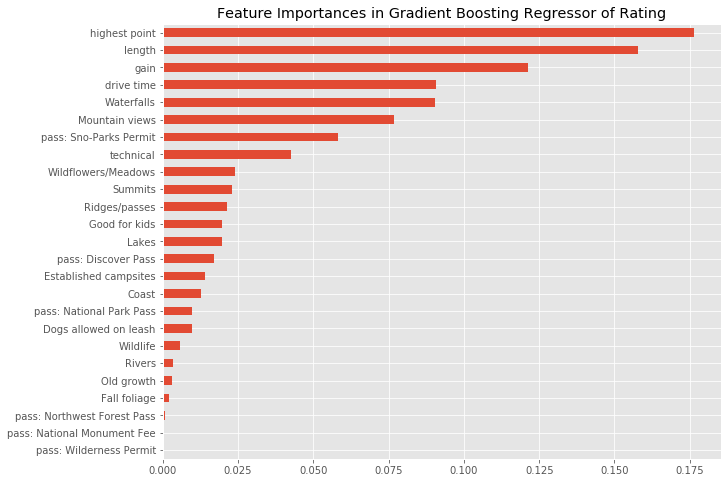

In [48]:
# Feature Importances
importances = pd.DataFrame({'features': model.feature_importances_}, 
                       index=columns)

rating_importances = importances.sort_values(by='features')
rating_importances.plot(kind='barh', figsize=(10,8), legend=False)
plt.title("Feature Importances in Gradient Boosting Regressor of Rating")
plt.savefig("../images/rating_gbr_feature_import.png", bbox_inches='tight', dpi=350)

## Combined Plots

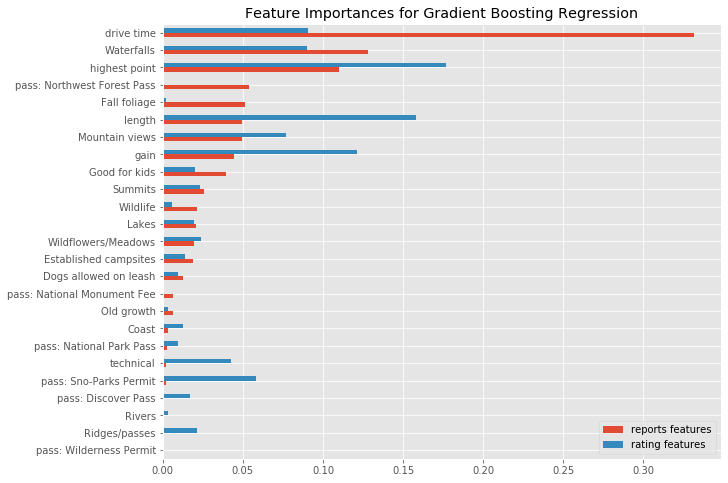

In [50]:
all_importances = pd.concat([
    reports_importances.rename(columns={'features':'reports features'}), 
    rating_importances.rename(columns={'features':'rating features'})
], axis=1) 
all_importances.plot(kind='barh', figsize=(10,8), legend=True)
plt.title("Feature Importances for Gradient Boosting Regression")
plt.savefig("../images/gbr_feature_importance.png", bbox_inches='tight', dpi=350)